# Problem 1


In this problem, you will use support vector approaches to predict whether a given car gets high or low gas mileage based on Auto data set: https://rdrr.io/cran/ISLR/man/Auto.html.

## (a) What is the fundamental idea behind Support Vector Machines?

Support Vector Machines aim to find the optimal hyperplane that separates data points into distinct classes, maximizing the margin between them, represented as the widest possible gap or "street" between parallel boundary lines.

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
data = pd.read_csv("Auto.csv")

In [5]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
# trying to find any null values
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

In [8]:
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [9]:
# Deleting the ? from the horsepower column
data = data[data['horsepower'] != '?']
data.loc[:, 'horsepower'] = data['horsepower'].astype(int)

In [10]:
# Checking if deleted succesfully
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


In [11]:
data.shape

(392, 9)

## (b) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [12]:
# Finding the median
mileage_median = data["mpg"].median()
mileage_median

22.75

In [13]:
data.loc[:, "mileage_rate"] = (data["mpg"] >= mileage_median).astype(np.intc)
data.iloc[-5:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mileage_rate
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,1
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10,1


## (c) Fit a linear support vector classifier to the data with various values of cost to predict whether a car gets high or low gas mileage. Comment on your results

In [14]:
X = data.iloc[:,:-2]
y = data["mileage_rate"]
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state = 0)

In [23]:
from sklearn import svm

# Define cost values and initialize data_list
cost_values = [0.0001, 1000]
data_list = {}

# Loop through cost values
for cost_value in cost_values:
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the SVM model
    svm_model = svm.LinearSVC(C=cost_value, loss="hinge", random_state=42, max_iter=5000)
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions
    predictions = svm_model.predict(X_test_scaled)
    
    # Store predictions and print results
    data_list[cost_value] = predictions
    print(f"C={cost_value}: {predictions}")
    print("Accuracy:", accuracy_score(y_test, predictions))

C=0.0001: [1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 0 1]
Accuracy: 0.8987341772151899
C=1000: [1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 1]
Accuracy: 1.0


In [24]:
data_list = pd.DataFrame(data_list)
data_list

,0.0001,1000.0000
0,1,1
1,1,0
2,0,0
3,1,1
4,1,1
...,...,...
74,0,1
75,0,0
76,1,1
77,0,0


In [25]:
print("When C=0.0001:")
print("Low milage prediction: ",len(data_list[data_list[0.0001]==0]))
print("High mileage prediction: ",len(data_list[data_list[0.0001]==1]))
print("")
print("When C=1000.0:")
print("Low mileage prediction: ",len(data_list[data_list[1000.0]==0]))
print("High mileage prediction: ",len(data_list[data_list[1000.0]==1]))

When C=0.0001:
Low milage prediction:  36
High mileage prediction:  43

When C=1000.0:
Low mileage prediction:  42
High mileage prediction:  37


The C parameter in SVM balances misclassification errors and margin size. A high C value (e.g., 1000) reduces misclassification by narrowing the margin, improving accuracy but reducing flexibility. A low C (e.g., 0.0001) widens the margin, tolerating misclassifications to better handle outliers.

## (d) Now repeat (c), this time using SVMs with radial and polynomial basis kernels with different values of gamma and degree, and cost. Comment on your results.

In [26]:
from sklearn.svm import SVC
gamma = [0.1, 5]
degree = [3, 10]

In [28]:
# Define hyperparameters
hyperparameters = [
    {"gamma": 0.1, "C": 0.001},
    {"gamma": 0.1, "C": 1000},
    {"gamma": 5, "C": 0.001},
    {"gamma": 5, "C": 1000},
]

# Initialize SVM classifiers
svm_clfs = []

# Loop through hyperparameters
for params in hyperparameters:
    gamma = params["gamma"]
    C = params["C"]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM with RBF kernel
    svm_clf = SVC(kernel="rbf", gamma=gamma, C=C)
    svm_clf.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = svm_clf.predict(X_test_scaled)
    svm_clfs.append(svm_clf)

    print(f"Radial SVM for gamma = {gamma}, C = {C}", y_pred)
    print("Accuracy:", accuracy_score(y_test, y_pred))


Radial SVM for gamma = 0.1, C = 0.001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Accuracy: 0.46835443037974683
Radial SVM for gamma = 0.1, C = 1000 [1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 0 1]
Accuracy: 0.9746835443037974
Radial SVM for gamma = 5, C = 0.001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Accuracy: 0.46835443037974683
Radial SVM for gamma = 5, C = 1000 [1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 1 0 1]
Accuracy: 0.9240506329113924


The radial SVM with gamma=0.1 and C=0.001 predicted predominantly high mileage, achieving only 46.8% accuracy, suggesting overfitting. Increasing C to 1000 improved the prediction balance and boosted accuracy to 97.5%, highlighting the role of regularization.

In [29]:
# Polynomial kernel SVMs
hyperparameters = [
    {"degree": 3, "C": 0.0001},
    {"degree": 10, "C": 1000},
]

for params in hyperparameters:
    degree = params["degree"]
    C = params["C"]

    # Build and train pipeline
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    svm_clf = SVC(kernel="poly", degree=degree, coef0=1, C=C)
    svm_clf.fit(X_train_scaled, y_train.values.ravel())

    # Make predictions
    y_pred = svm_clf.predict(X_test_scaled)

    print(f"Polynomial SVM for degree = {degree}, C = {C}", y_pred)
    print("Accuracy:", accuracy_score(y_test, y_pred))

Polynomial SVM for degree = 3, C = 0.0001 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
Accuracy: 0.46835443037974683
Polynomial SVM for degree = 10, C = 1000 [1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 0 1]
Accuracy: 0.9240506329113924


A high gamma value (5) paired with a low C (0.001) caused similar overfitting, while increasing regularization (C=1000) improved accuracy to 92.4%. For polynomial kernels, degree 3 with low C and degree 10 with high C initially produced poor predictions, but accuracy reached 92.4% with higher degrees and proper regularization. These findings emphasize the critical interplay between regularization and kernel parameters for building accurate, generalizable SVM models.

# Problem 2


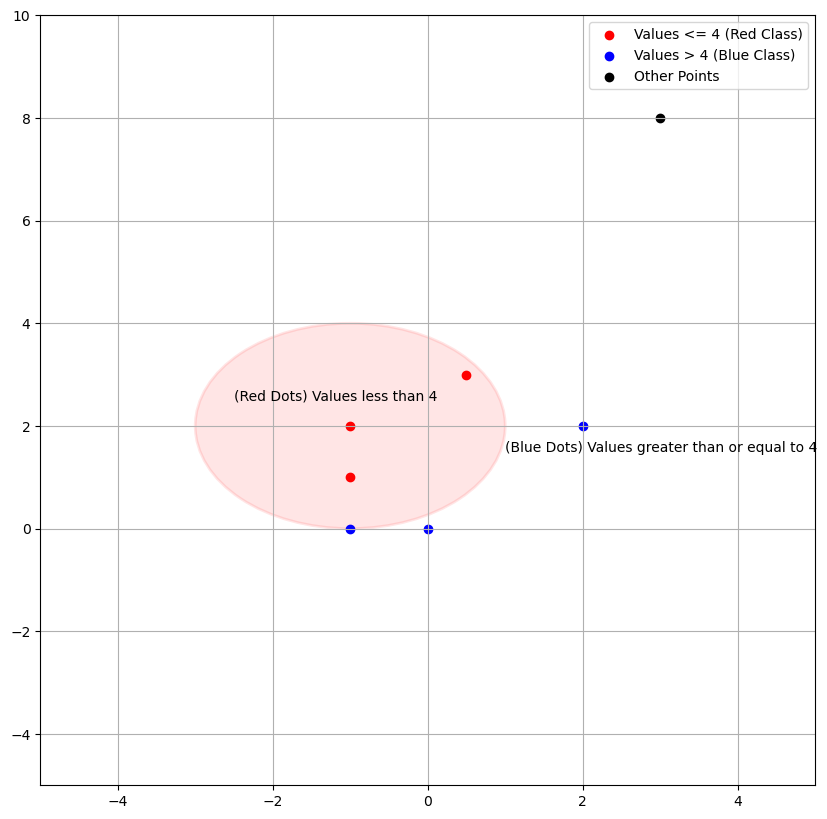

In [30]:
# Define the circle and points
circle_center = (-1, 2)
circle_radius = 2
red_points = [(-1, 2), (-1, 1), (0.5, 3)]
blue_points = [(0, 0), (2, 2), (-1, 0)]
black_point = [(3, 8)]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add circle representing the decision boundary
circle = plt.Circle(circle_center, radius=circle_radius, facecolor='r', alpha=0.1, edgecolor='r', linewidth=2.0)
ax.add_artist(circle)

# Scatter points
red_x, red_y = zip(*red_points)
blue_x, blue_y = zip(*blue_points)
black_x, black_y = zip(*black_point)

ax.scatter(red_x, red_y, c='r', label="Values <= 4 (Red Class)")
ax.scatter(blue_x, blue_y, c='b', label="Values > 4 (Blue Class)")
ax.scatter(black_x, black_y, c='k', label="Other Points")

# Add text annotations
ax.text(-2.5, 2.5, "(Red Dots) Values less than 4", color='black', size=10)
ax.text(1, 1.5, "(Blue Dots) Values greater than or equal to 4", color='black', size=10)

# Set axis limits and grid
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 10)
ax.grid(True)

# Add legend
ax.legend()

# Show the plot
plt.show()


Points (-1,0), (2,2), (-1,-1) falls under (1 + x_1)^2 + (2 − x_2)^2 > 4

Points (-1, 1), (0,0) and (0.5, 3) falls under (1 + x_1)^2 + (2 − x_2)^2 ≤ 4

Observations:

(0,0) : Blue Class

(-1,1) : Red Class

(2,2) : Red Class

(3,8) : Blue Class
